In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image

# Visualizaciones en Python

## Consigna: 

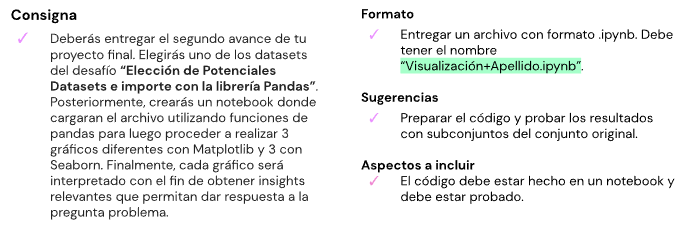

In [ ]:
Image("/content/drive/MyDrive/DataScience/Segunda entrega/Screenshot_1.png")

## Introduccion

Para este segundo desafio entregable se ha elegido el dataset de starcraft. 



Se procedera a buscar que variables son las de mayor interes y hacer un analisis con graficos representativos de las mismas.

Se buscara determinar que cualidades tienen los mejores jugadores que los hacen tan buenos en comparacion con el jugador promedio

## Desarrollo

Primero que nada importamos las librerias que se utilizaran seguido por el dataset seleccionado

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_sc = pd.read_csv(r'/content/drive/MyDrive/DataScience/Segunda entrega/SkillCraft.csv')

Una vez immportado el dataset se comienza el analisis, lo primero que se vera es cuantos jugadores hay en cada division

In [ ]:
amount_players = []
i=1

while i<=7:
    amount_players.append(data_sc["LeagueIndex"].value_counts()[i])
    i += 1

amount_players

[167, 347, 553, 811, 804, 621, 35]

In [ ]:
division = ["Bronze", "Silver", "Gold", "Platinum", "Diamond", "Champion", "Grand champion"]

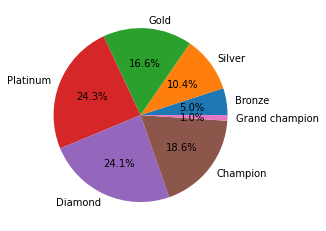

In [ ]:
plt.pie(amount_players, labels=division, autopct = "%0.1f%%")
plt.show()

En este grafico se puede observar que porcentaje del dataset esta en cada una de las divisiones, aunque no necesariamente es representativo de la realidad, mirando fuentes oficiales encontramos esta tabla: 

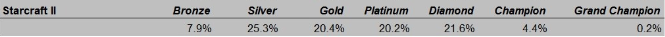

In [ ]:
Image("/content/drive/MyDrive/DataScience/Segunda entrega/Screenshot_2.png")

Es facil darse cuenta que nuestro dataset tiene un sesgo hacia los jugadores de mayor habilidad, esto puede deberse entre otras cosas a que es mas probable que estos jugadores usen aplicaciones de terceros para monitorear sus estadisticas y estas son las que conseguimos en nuestro dataset.

Lo siguiente que se analizara sera la dedicacion de los jugadores en cada division, es decir, cuantas horas juegan por semana.

In [ ]:
hours = []
i=1

while i<=7:
    string = "LeagueIndex =="+str(i)
    hours.append(data_sc.query(string)["HoursPerWeek"])
    i +=1



/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Horas')

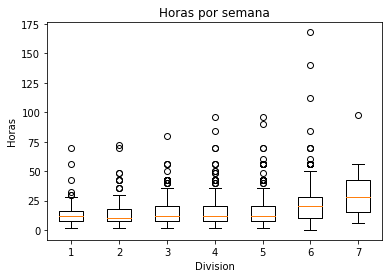

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(hours)
ax.set_title("Horas por semana")
ax.set_xlabel("Division")
ax.set_ylabel("Horas")

Text(0.5, 1.0, 'Horas por semana')

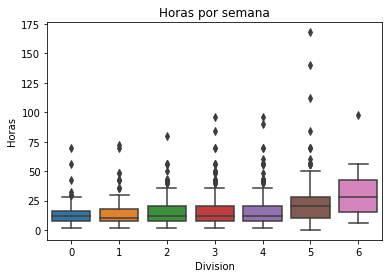

In [ ]:
sns_plot = sns.boxplot(data=hours)
sns_plot.set_xlabel("Division")
sns_plot.set_ylabel("Horas")
sns_plot.set_title("Horas por semana")

En este grafico se observa un leve crecimiento de las horas jugadas a medida que avanzamos de division, este crecimiento no es significativo hasta llegar a las divisiones de champion y grand champion donde se hace mas notorio.

Para finalizar con las variables externas al juego propiamente dicha se vera el rango de edades de los jugadores y cual es su distribucion.

In [ ]:
print(data_sc["Age"].min())
print(data_sc["Age"].max())

16
44


In [ ]:
x = np.arange(16,45)

In [ ]:
y = []

for i in x:
    try:
        y.append(data_sc["Age"].value_counts()[i])
    except KeyError:
        y.append(0)


Text(0.5, 0, 'Edad')

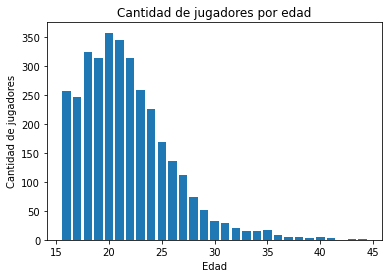

In [ ]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title("Cantidad de jugadores por edad")
ax.set_ylabel("Cantidad de jugadores")
ax.set_xlabel("Edad")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cantidad de jugadores por edad')

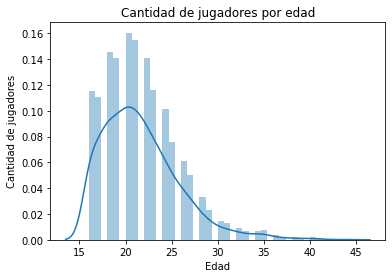

In [ ]:
sns_plot = sns.distplot(data_sc["Age"])
sns_plot.set_ylabel("Cantidad de jugadores")
sns_plot.set_xlabel("Edad")
sns_plot.set_title("Cantidad de jugadores por edad")

Podemos observar como la mayor densidad de jugadores en nuestro dataset esta al rededor de los 20 años y decae hacia ambos lados.

Probablemente en la realidad existan jugadores de menos de 15 años a pesar de no tener registro de ninguno.

Asumiendo que si existen estos jugadores con menos de 15 años, podriamos llegar a suponer que tenemos una distribucion normal centrada en 20.

A continuacion se creara un nuevo dataframe dividido por cada una de las divisiones y el promedio de cada una de ellas como dato.

In [ ]:
indice = list(data_sc.columns)
indice.remove("HoursPerWeek")
indice.remove("GameID")
indice.remove("Age")
indice.remove("LeagueIndex")

df_division = pd.DataFrame(index = indice, columns = division)
df_division

,Bronze,Silver,Gold,Platinum,Diamond,Champion,Grand champion
TotalHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SelectByHotkeys,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AssignToHotkeys,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UniqueHotkeys,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinimapAttacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinimapRightClicks,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPACs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GapBetweenPACs,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActionLatency,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
i=1
while i <=7:
    index = data_sc["LeagueIndex"] == i
    temp = data_sc[index]
    temp = temp.drop(["GameID","Age","HoursPerWeek","LeagueIndex"], axis=1)
    temp = temp.mean()
    df_division.iloc[:,i-1]=temp 
    i+=1
df_division

,Bronze,Silver,Gold,Platinum,Diamond,Champion,Grand champion
TotalHours,264.191617,331.409222,493.792043,588.006165,2024.493781,988.405797,1581.028571
APM,59.539277,74.780917,89.971260,105.847166,131.578332,158.683211,189.555686
SelectByHotkeys,0.001081,0.001536,0.002188,0.003150,0.004980,0.007437,0.009418
AssignToHotkeys,0.000185,0.000222,0.000282,0.000340,0.000414,0.000512,0.000723
UniqueHotkeys,3.215569,3.351585,3.687161,3.971640,4.703980,5.521739,6.771429
MinimapAttacks,0.000028,0.000045,0.000056,0.000075,0.000115,0.000156,0.000340
MinimapRightClicks,0.000208,0.000276,0.000332,0.000368,0.000427,0.000473,0.000570
NumberOfPACs,0.002363,0.002650,0.002976,0.003310,0.003744,0.004231,0.005111
GapBetweenPACs,65.654987,53.788886,46.143882,41.041426,34.711566,30.207895,22.978160
ActionLatency,95.404977,81.270053,73.697301,64.793765,56.078723,48.947837,40.342903


Con este nuevo dataframe analizaremos el promedio de una de las variables a modo de demostracion. 

Text(0.5, 1.0, 'Apm vs Division')

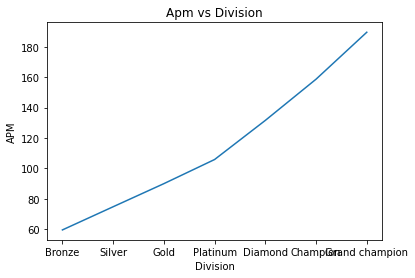

In [ ]:
sns_plot = sns.lineplot(data=df_division.T["APM"])
sns_plot.set_xlabel("Division")
sns_plot.set_title("Apm vs Division")

En este grafico se puede observar de forma clara como a medida que se avanza en la division aumentan las acciones por minuto que ejerce el jugador.

Text(0.5, 1.0, 'Trabajadores vs Division')

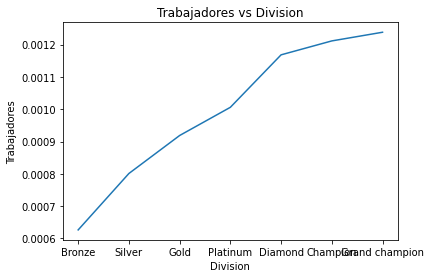

In [ ]:
sns_plot = sns.lineplot(data=df_division.T["WorkersMade"])
sns_plot.set_xlabel("Division")
sns_plot.set_ylabel("Trabajadores")
sns_plot.set_title("Trabajadores vs Division")

Text(0.5, 1.0, 'Unidades unicas vs Division')

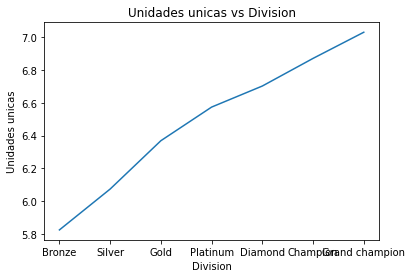

In [ ]:
sns_plot = sns.lineplot(data=df_division.T["UniqueUnitsMade"])
sns_plot.set_xlabel("Division")
sns_plot.set_ylabel("Unidades unicas")
sns_plot.set_title("Unidades unicas vs Division")

En estos ultimos graficos podemos ver una clara tendencia creciente a medida que avanzamos en las divisiones, lo que podemos interpretar como que para mejorar en el juego es necesario mejorar en estos aspectos y en el caso de las horas totales nos indica que hay que dedicarle tiempo para mejorar.